In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
sns.set(
        font_scale = 2,
        style      = "whitegrid",
        rc         = {'figure.figsize' : (15,7)}
        )
plt.style.use('dark_background')
df = pd.read_csv("KC_case_data.csv") 

In [9]:
df.head(3)

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal


In [16]:
df.groupby('event').event.value_counts()

event
app_install    154597
app_start      748705
choose_item    538669
purchase       141383
register        78310
search         708639
tap_basket     377665
Name: count, dtype: int64

In [32]:
df.groupby('utm_source').utm_source.value_counts()

utm_source
-                610458
facebook_ads     336953
google_ads       374257
instagram_ads    382891
referal          234721
vk_ads           418456
yandex-direct    390232
Name: count, dtype: int64

In [37]:
df.groupby('utm_source').utm_source.count()

utm_source
-                610458
facebook_ads     336953
google_ads       374257
instagram_ads    382891
referal          234721
vk_ads           418456
yandex-direct    390232
Name: utm_source, dtype: int64

In [65]:
df.date = pd.to_datetime(df.date)


array([[<Axes: title={'center': 'date'}>]], dtype=object)

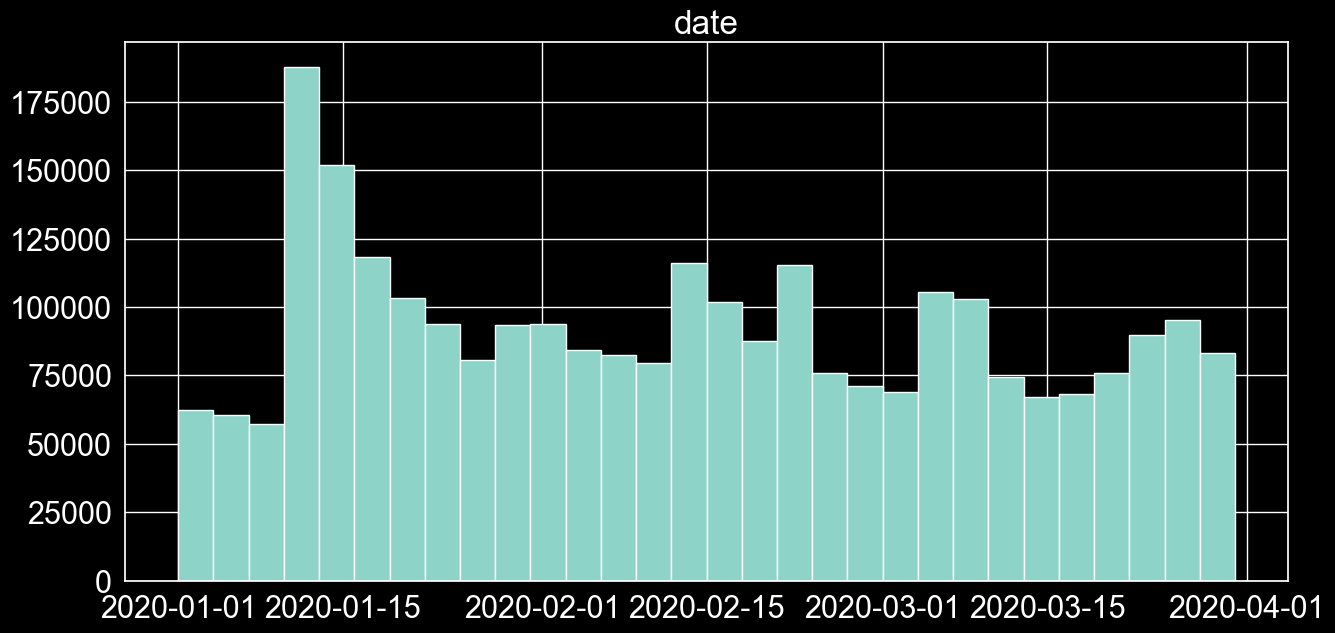

In [62]:
df[['date', 'event']].hist(bins  =30)

In [94]:
df[(df.date.dt.month == 2)].groupby('device_id').agg({'device_id':'nunique'}).device_id.count()

np.int64(75032)

In [95]:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


In [96]:
df[(df.date.dt.month == 1) & (df.event == 'app_install')].event.count()

np.int64(80297)

In [99]:
df[df.event == 'app_install'].groupby('utm_source').count()

,date,event,purchase_sum,os_name,device_id,gender,city
utm_source,,,,,,,
-,32460,32460,0,32460,32460,32460,32460
facebook_ads,13916,13916,0,13916,13916,13916,13916
google_ads,26286,26286,0,26286,26286,26286,26286
instagram_ads,20096,20096,0,20096,20096,20096,20096
referal,9282,9282,0,9282,9282,9282,9282
vk_ads,23189,23189,0,23189,23189,23189,23189
yandex-direct,29368,29368,0,29368,29368,29368,29368
